In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
from matplotlib import pyplot as plt

In [34]:
from keras.models import Sequential

In [35]:
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [37]:
from keras.utils import np_utils

In [38]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [40]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

In [96]:
from tensorflow.keras.models import Model

In [42]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [43]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [44]:
from tensorflow.keras.preprocessing import image

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [46]:
from tensorflow.keras.models import Sequential

In [47]:
import numpy as np

In [61]:
from glob2 import glob

In [62]:
IMAGE_SIZE = [224, 224]

In [78]:
train_path = '/content/drive/MyDrive/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset/validation'

In [79]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [80]:
for layer in inception.layers:
  layer.trainable = True

folders = glob('/content/drive/MyDrive/Dataset/train/*')

In [81]:
folders

['/content/drive/MyDrive/Dataset/train/aloe_vera_healthy',
 '/content/drive/MyDrive/Dataset/train/aloe_vera_rot',
 '/content/drive/MyDrive/Dataset/train/aloe_vera_rust',
 '/content/drive/MyDrive/Dataset/train/duranta_erecta_healthy',
 '/content/drive/MyDrive/Dataset/train/eleanor_roosevelt_croton',
 '/content/drive/MyDrive/Dataset/train/fittonia_frankie_ealthy',
 '/content/drive/MyDrive/Dataset/train/haworthia',
 '/content/drive/MyDrive/Dataset/train/hoya_carnosa',
 '/content/drive/MyDrive/Dataset/train/minthostachys_mollis_healthy',
 '/content/drive/MyDrive/Dataset/train/minthostachys_mollis_leaf_withering',
 '/content/drive/MyDrive/Dataset/train/violet_heart_healthy',
 '/content/drive/MyDrive/Dataset/train/snow_rose',
 '/content/drive/MyDrive/Dataset/train/violet_heart_leaf_withering',
 '/content/drive/MyDrive/Dataset/train/watermelon_peperomia_healthy',
 '/content/drive/MyDrive/Dataset/train/watermelon_peperomia_;eaves_splitting',
 '/content/drive/MyDrive/Dataset/train/not_plants']

In [82]:
x = Flatten()(inception.output)

In [84]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [85]:
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 111, 111, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

In [99]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [101]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [103]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1514 images belonging to 16 classes.


In [106]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1514 images belonging to 16 classes.


In [110]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-110-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
48/48 [==============================] - 706s 15s/step - loss: 0.4616 - accuracy: 0.8705 - val_loss: 46380.9414 - val_accuracy: 0.1915
Epoch 2/10
48/48 [==============================] - 510s 11s/step - loss: 2.8786 - accuracy: 0.5793 - val_loss: 17351288832.0000 - val_accuracy: 0.1830
Epoch 3/10
48/48 [==============================] - 511s 11s/step - loss: 1.3125 - accuracy: 0.6189 - val_loss: 920337.3125 - val_accuracy: 0.1869
Epoch 4/10
48/48 [==============================] - 506s 11s/step - loss: 1.0469 - accuracy: 0.7345 - val_loss: 95.9911 - val_accuracy: 0.3976
Epoch 5/10
48/48 [==============================] - 515s 11s/step - loss: 0.8431 - accuracy: 0.8065 - val_loss: 8.1138 - val_accuracy: 0.7338
Epoch 6/10
48/48 [==============================] - 507s 11s/step - loss: 0.6496 - accuracy: 0.8342 - val_loss: 0.6028 - val_accuracy: 0.8124
Epoch 7/10
48/48 [==============================] - 514s 11s/step - loss: 0.6575 - accuracy: 0.8355 - val_loss: 0.6058 - val_acc

In [111]:
import matplotlib.pyplot as plt

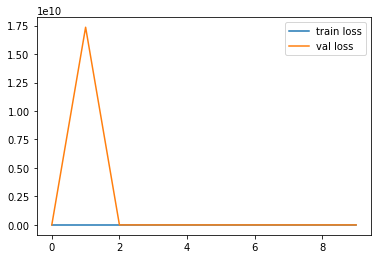

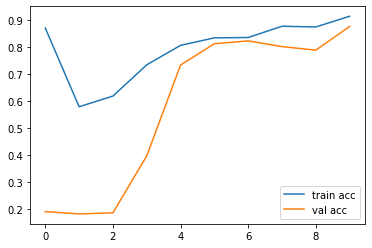

<Figure size 432x288 with 0 Axes>

In [112]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [113]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [114]:
y_pred = model.predict(test_set)

48/48 [==============================] - 245s 5s/step


In [115]:
y_pred

array([[8.7578141e-05, 6.9480702e-05, 1.2671212e-03, ..., 6.7051172e-01,
        4.3649776e-03, 6.3699606e-04],
       [2.5249953e-08, 4.4502794e-06, 6.6973107e-06, ..., 2.4568145e-03,
        2.1582311e-05, 2.3664117e-05],
       [5.8096350e-05, 1.3760328e-02, 9.8618013e-01, ..., 8.0500136e-08,
        3.5203021e-07, 2.2745497e-09],
       ...,
       [2.1104226e-01, 4.5012632e-01, 3.2187536e-01, ..., 7.9644169e-04,
        6.9987820e-03, 3.4348334e-03],
       [5.3918279e-09, 3.3687261e-08, 2.8714103e-07, ..., 1.2381724e-04,
        9.6179838e-06, 6.3997061e-09],
       [8.5104022e-09, 5.9183378e-09, 1.0138896e-06, ..., 5.9754178e-08,
        1.8257656e-04, 3.3955004e-08]], dtype=float32)

In [116]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [117]:
y_pred

array([13, 12,  2, ...,  1,  9,  4])

In [118]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [120]:
model=load_model('/content/model_inception.h5')

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__